# CSRF实现的条件
1. 攻击建立在浏览器和WEB服务器的会话之中
2. 欺骗用户点击按钮并访问URL
3. WEB端自身功能没有refer tooken 验证码等验证手段,还有修改账号密码处不需要重新输入原密码.

# CSRF类型
#### 扫描器扫的CSRF漏洞很多都是误报,主要是因为没有token值或者refer请求头,还是需要人工验证一下
1. 站内攻击
    - 因为程序员不恰当使用```$_REQUEST```类变量造成.在一些敏感的操作中（如修改密码、添加用户等），本来要求用户从表单提交发起POST请求传递参数给程序，但是由于使用了```$_REQUEST```等变量，程序除支持接收POST请求传递的参数外也支持接收GET请求传递的参数，这样就会为攻击者使用CSRF攻击创造条件。一般攻击者只要把预测的请求参数放在站内一个贴子或者留言的图片链接里，受害者浏览了这样的页面就会被强迫发起这些请求。

2. 站内攻击漏洞复现
    - 1. IIS下的XYCMS网站,搭建环境注意数据库文件的权限设置写入以及开启父路径浏览
    通过创建新的管理员用户名抓包如下,并用BP生成CSRF的payload,讲payload另存为html文件,以邮件钓鱼形式诱骗管理员点击即可自动添加新的管理员
    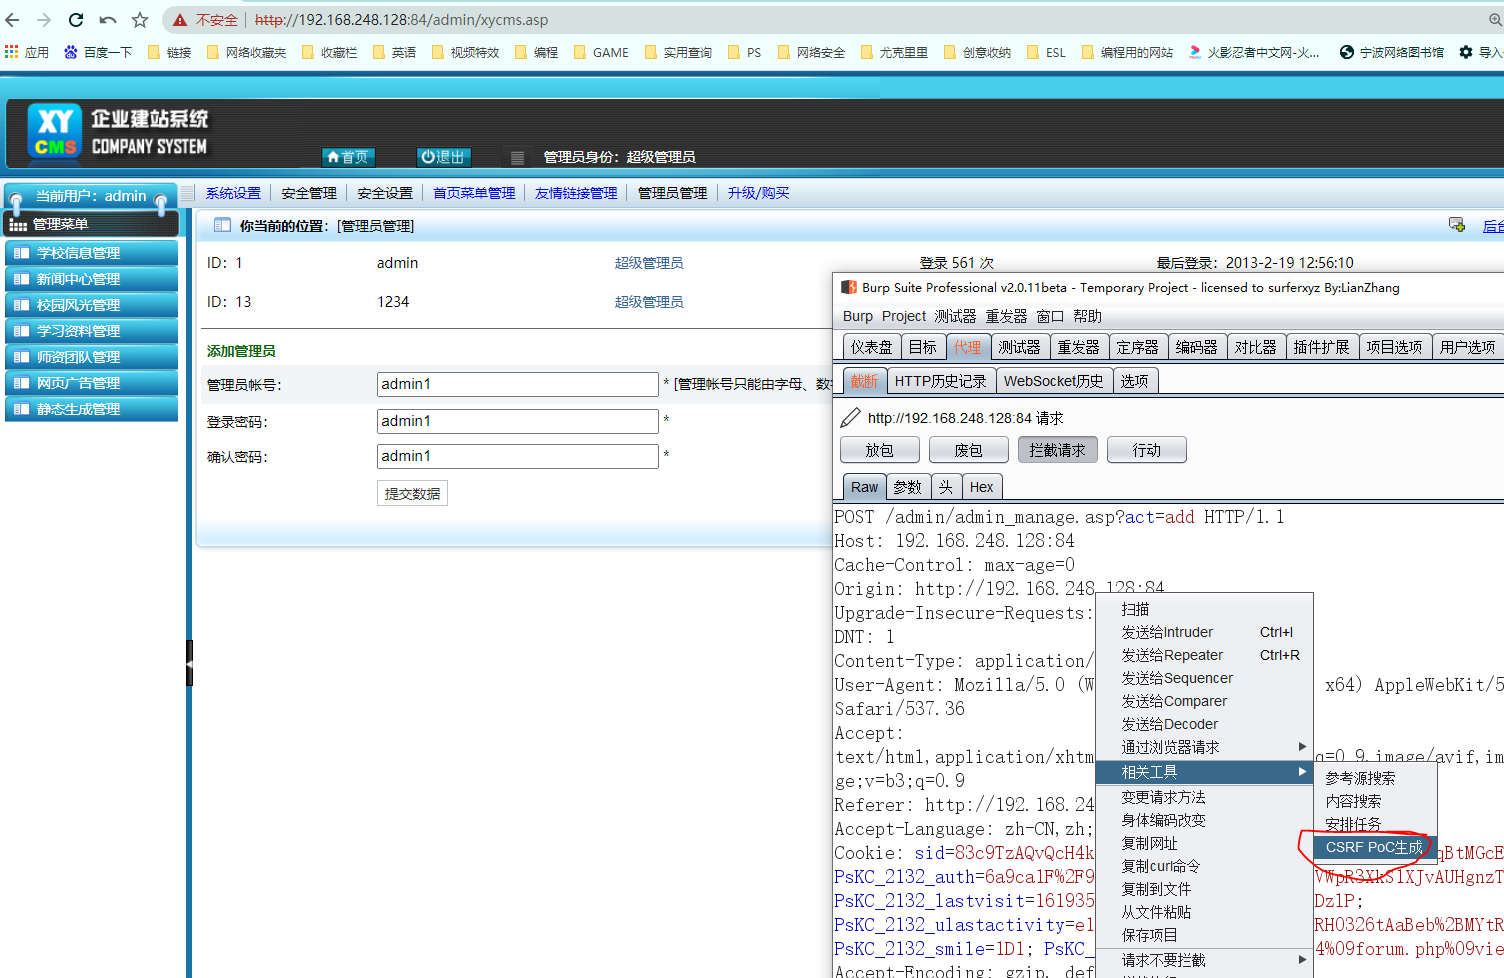
    
    - 2. phpstudy下的DWVA,将DVWA的security改为低,(级别为中也只是新增了refer头,可以人为构造),其中可以对改密码进行抓包,payload=```http://192.168.248.128:90/DVWA/vulnerabilities/csrf/?password_new=pwd&password_conf=pwd&Change=Change```
    
3. 站外攻击  
    - (术语解释)攻击者可以事先预测并设置请求的参数，在站外的Web页面里编写脚本伪造文件请求，或者和自动提交的表单一起使用来实现GET、POST请求，当用户在会话状态下点击链接访问站外Web页面，客户端就被强迫发起请求
    - (白话文解释)上述解释大致意思为由于程序员未对程序代码进行相应过滤导致客户端从站外被上传恶意代码,管理员或者相关权限的人在不知情的情况下点击触发,造成攻击,比如论坛中论坛发布中插入的不可见的恶意链接.  
4. 站外攻击漏洞复现
    - 以Discuz这个论坛网页为案例,在搭建完论坛后,用管理员登陆后,在管理中心的用户下添加普通用户,在论坛版块下随便添加一个新的版块.
    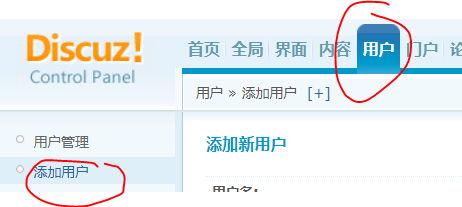  
    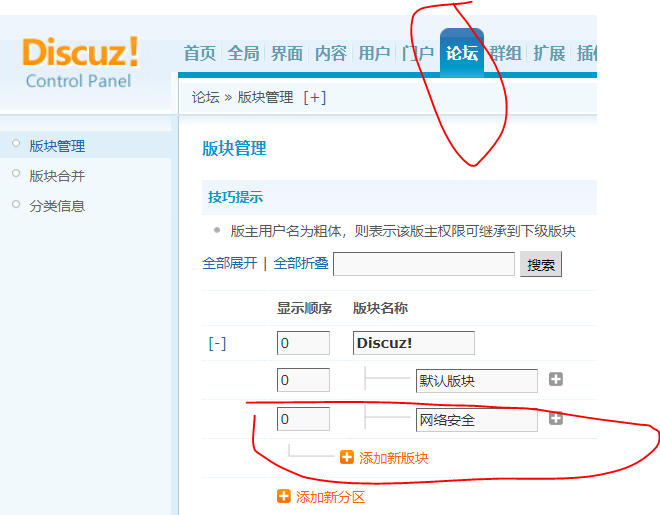
    - 在UCenter下的数据备份进行CSRF漏洞攻击,其中backupdir=<font color = "red">xxxx</font>%26backupfilename%3D<font color = "red">aaa</font>的红色部分为备份的文件夹和备份文件
    payload:http://192.168.248.128:90/discuz/upload/uc_server/admin.php?m=db&a=operate&t=export&appid=0&backupdir=xxxx%26backupfilename%3Daaa
    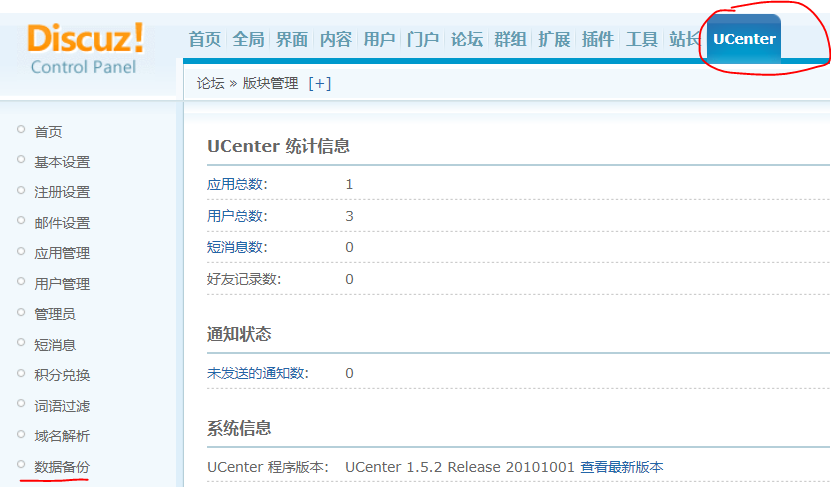
    - 普通用户用payload进行插入,一旦管理员访问这个帖子会自动进行备份.普通用户可以通过固定的路径和备份文件夹以及备份文件构造出url,进行偷库
    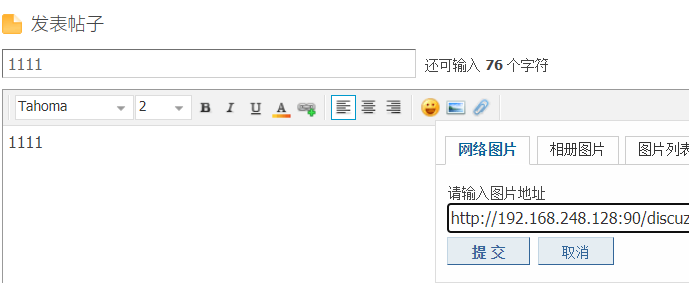
    - url = ```http://192.168.248.128:90/discuz/upload/uc_server/data/backup/xxx/aaa-1.sql```
    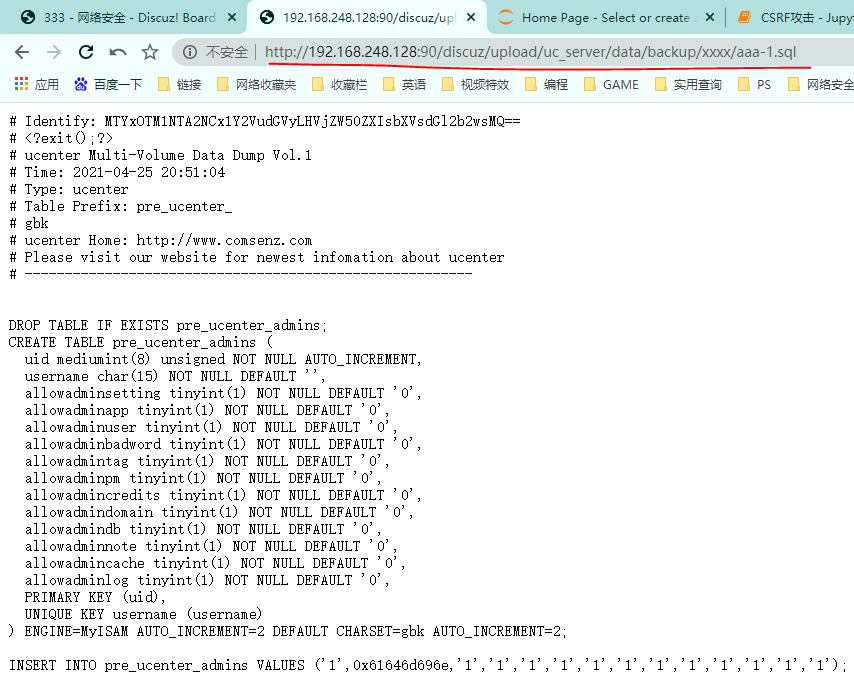


## 利用压缩包进行CSRF攻击

1. 选择自解压模式
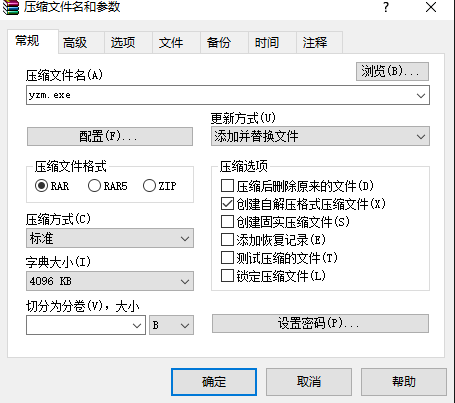
2. 高级-自解压选项-模式-全部隐藏
3. 设置解压前运行或者解压后运行,这里解压前访问百度网站,也可以把get请求的payload网址放里面,解压后运行改DWVA的密码的CSRF的payload文件
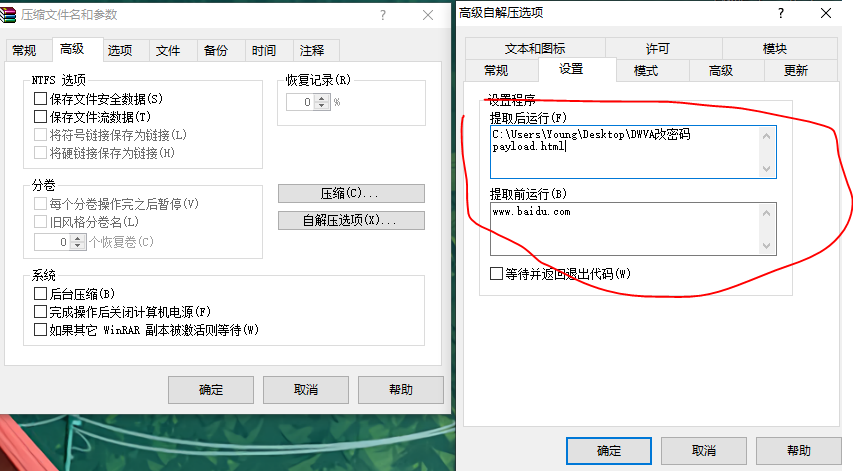
4. 更新选项选择直接覆盖已存在文件,避免跳出对话框弹窗,配合 step2效果更好
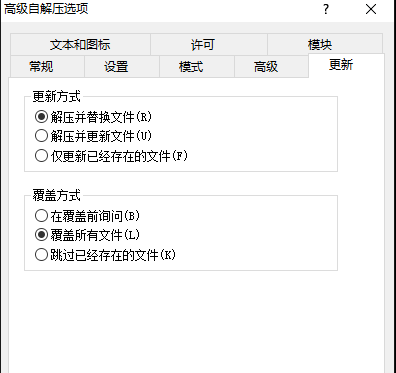

### CSRF 无需浏览器案例
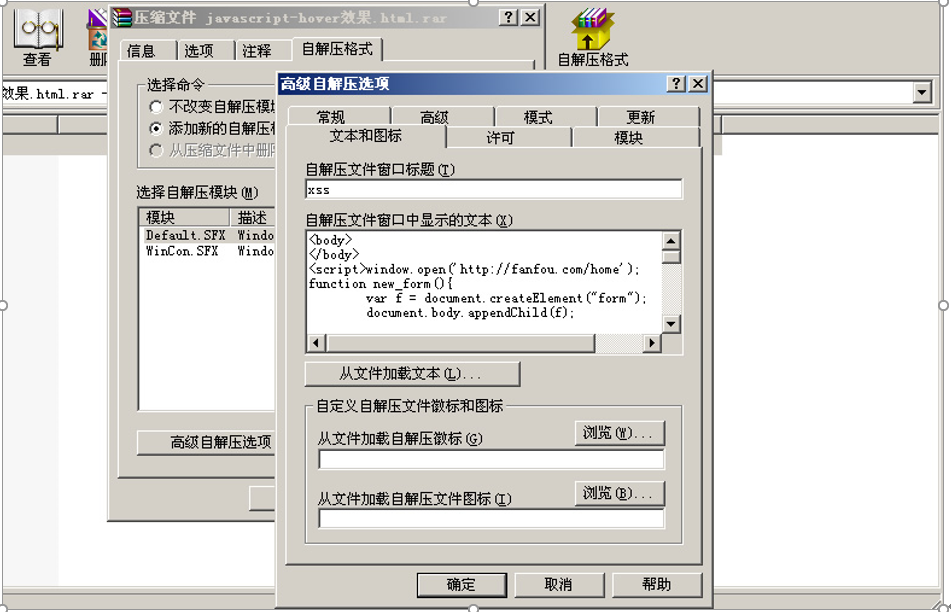
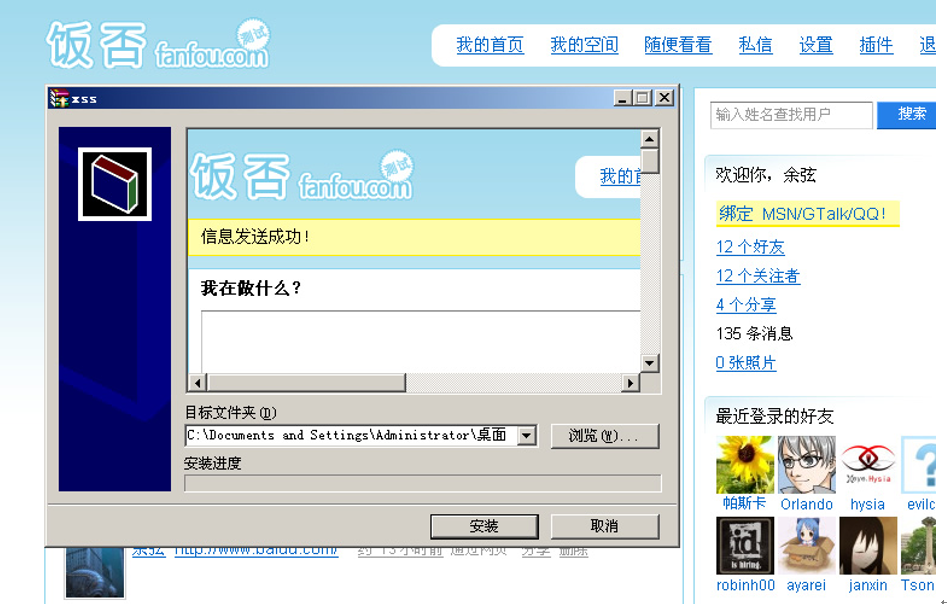

## CSRF漏洞防御
#### 目前业界服务器端防御CSRF攻击主要有5种策略
### 1. 验证HTTP Referer字段，
### 2. 在请求地址中添加token并验证，
### 3. 在HTTP头中自定义属性并验证等
自定义属性的方法也是使用token并进行验证，和前一种方法不同的是，这里并不是把token以参数的形式置于HTTP请求之中，而是把它放到HTTP头中自定义的属性里。通过XMLHttpRequest这个类，可以一次性给所有该类请求加上csrftoken这个HTTP头属性，并把token值放入其中。这样解决了前一种方法在请求中加入token的不便，同时，通过这个类请求的地址不会被记录到浏览器的地址栏，也不用担心token会通过Referer泄露到其他网站。
### 4. 在服务端区严格区分好POST与GET的数据请求
### 5. 使用验证码或者密码确认方式进行